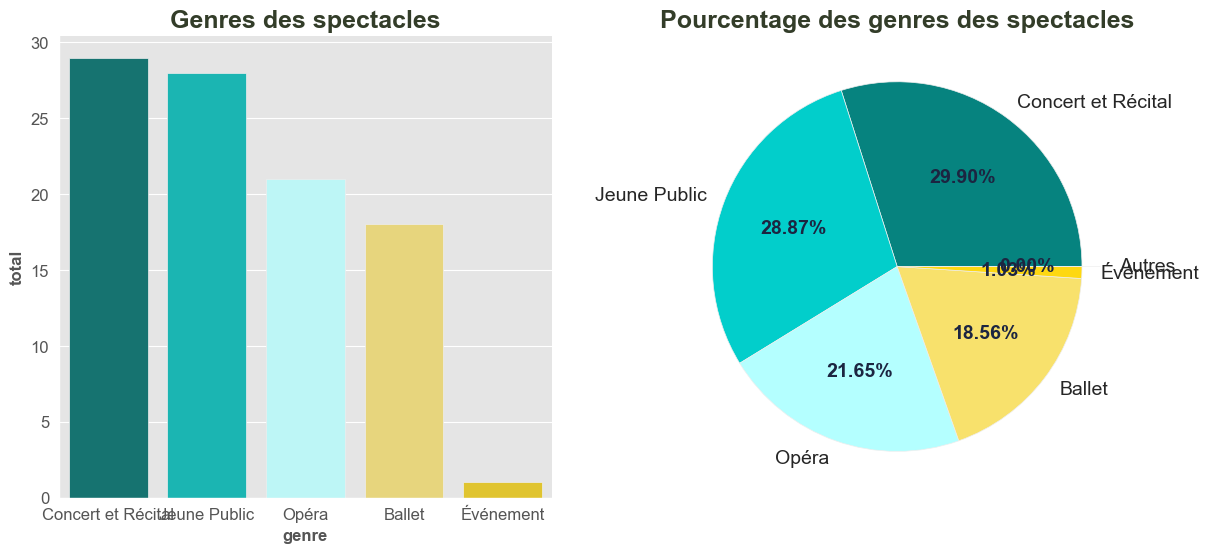

0                                                                                                                                                                                                   Lohengrin Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 7 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques)  et la partition, il pose les premiers jalons de son  drame musical  auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps e

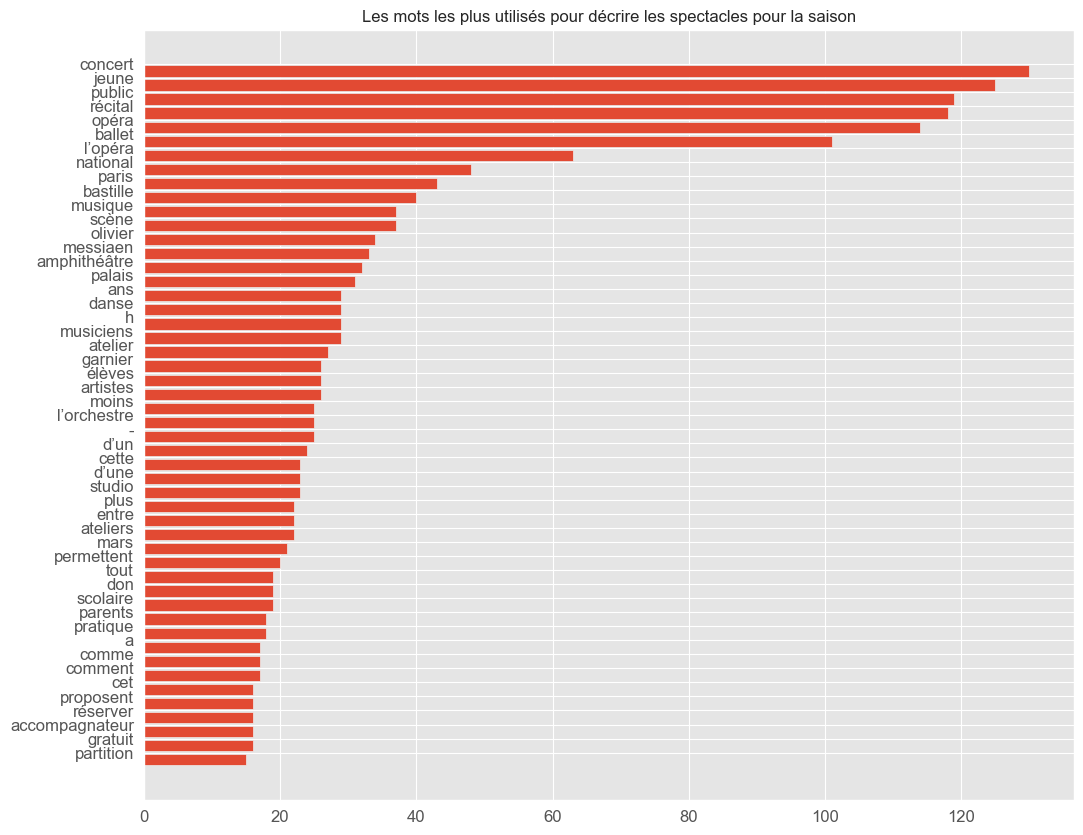

1.0
2.697594501718213


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
    get_ipython().run_line_magic('run', '-i data_exploration.ipynb')
finally:
    plt.close('all')

Utilisation de Spotlight : pip3 install git+https://github.com/maciejkula/spotlight.git@master#egg=spotlight

### Un exemple avec la dataset Movielens 

In [2]:
from spotlight.cross_validation import random_train_test_split
from spotlight.datasets.movielens import get_movielens_dataset
from spotlight.evaluation import mrr_score
from spotlight.factorization.implicit import ImplicitFactorizationModel

dataset = get_movielens_dataset(variant='100K')
print(dataset)

train, test = random_train_test_split(dataset)

print(test)

model = ImplicitFactorizationModel(n_iter=3,
                                   loss='bpr')
model.fit(train)

mrr = mrr_score(model, test)

# Predicting 3 items for user 0
user_id_to_predict = 100
scores = model.predict(user_id_to_predict)
top_3_items = np.argsort(scores)[-3:][::-1]

# Displaying the predicted items
print(f"Top 3 predicted items for user {user_id_to_predict}: {top_3_items}")


<Interactions dataset (944 users x 1683 items x 100000 interactions)>
<Interactions dataset (944 users x 1683 items x 20000 interactions)>
Top 3 predicted items for user 100: [323 300 333]


### Un exemple Spotlight avec un dataset User, Item et Rating

In [3]:
from spotlight.interactions import Interactions
from spotlight.cross_validation import user_based_train_test_split
from spotlight.datasets.synthetic import generate_sequential
from spotlight.evaluation import mrr_score
from spotlight.evaluation import rmse_score


# Sample data for illustration
user_id = [0, 0, 1, 1, 2, 2]
item_id = [0, 1, 0, 2, 1, 3]
rating = [5, 4, 5, 3, 4, 2]

dataset_auto = generate_sequential(num_users=100,
                              num_items=1000,
                              num_interactions=10000,
                              concentration_parameter=0.01,
                              order=3)

print(dataset_auto)

user_ids = np.array([1, 2, 3, 4, 5], dtype=np.int32)
item_ids = np.array([1, 1, 2, 3, 4], dtype=np.int32)
ratings_values = np.array([5, 1, 4, 3, 2], dtype=np.int32)

dataset_custom = Interactions(user_ids, item_ids, ratings=ratings_values)

print(dataset_custom)

user_ids = data_ratings['id_user'].values.astype(np.int32) 
item_ids = data_ratings['id_show'].values.astype(np.int32) 
ratings_values = data_ratings['rating'].values.astype(np.int32)


#user_ids = data_views['id_user'].values.astype(np.int32) 
#item_ids = data_views['id_show'].values.astype(np.int32) 
#weight_values_views = data_views['views'].values.astype(np.int32) 
#weight_values_plays = data_plays['views'].values.astype(np.int32) 

dataset = Interactions(user_ids, item_ids, ratings=ratings_values)
#dataset = Interactions(user_ids, item_ids, ratings=None, weights=weight_values_views)

print(dataset)

# Split the dataset into train and test sets
train, test = user_based_train_test_split(dataset, test_percentage=0.2)

# Training an implicit factorization model, use of Adam optimizer
model = ImplicitFactorizationModel(n_iter=100, loss='bpr')
model.fit(train)

rmse = rmse_score(model, test)

print('Evaluate model:', rmse)

# Predicting 3 items for user 
user_id_to_predict = 0
scores = model.predict(user_id_to_predict)
top_3_items = np.argsort(scores)[-3:][::-1]

# Displaying the predicted items
print(f"Top 3 predicted items for user {user_id_to_predict}: {top_3_items}")

# SAve moddel
#torch.save(spotlight_model, PATH)

#Load Model
#spotlight_model = torch.load(PATH)




<Interactions dataset (100 users x 1000 items x 10000 interactions)>
<Interactions dataset (6 users x 5 items x 5 interactions)>
<Interactions dataset (95 users x 1151 items x 99 interactions)>
Evaluate model: 3.312321175394205
Top 3 predicted items for user 0: [1053 1113 1118]
